# 1. Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Librairies

In [ ]:
!pip install plot_keras_history

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.39-py3-none-any.whl size=10667 sha256=72b877cf9ad9bd4f195965c912e79accd350dbb44ac9560b312c79249fdbf8b2
  Stored in directory: /root/.cache/pip/wheels/6d/89/e0/6781cca14c32fdba8e81404d9f09e1be1436deee5377160507
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.1.4-py3-none-any.whl size=324285 sha256=99af6e219a45d8e7350ed53f03c7f2ca8b2e25e43b87741552e4ecae4c4f298d
  Stored in directory: /root/.cache/pip/wheels/cc/37/0c/923ffeccf1ed550f523bb269e185103538592636861a48b84f
  Created wheel for compress-json: filename=compress_json-1.1.1-py3-none-any.whl size=6599 sha256=11a76f02dbd32b8dc0170ad89dbf8a48d4ad8e9cc01e4fff6c42d93aade5773f
  Stored in directory: /root/.cache/pip/wheels/41/5b/81/3d4b79d6340

In [ ]:
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from plot_keras_history import show_history, plot_history
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## 1.2 Options

In [ ]:
os.chdir("/content/drive/MyDrive/OpenClassrooms/Data Scientist/Projets/P6/Projet")

## 1.3 Data

In [ ]:
df = pd.read_csv("Data/df_images.csv", sep=";")
df.head()

,uniq_id,product_name,image,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7,filtered_text
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,Non spécifié,Non spécifié,Non spécifié,elegance polyester multicolor abstract eyelet ...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",Non spécifié,Non spécifié,cotton bath towel bath towel red yellow blue b...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,Non spécifié,Non spécifié,eurospa cotton terry face towel set size small...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,Non spécifié,Non spécifié,santosh royal fashion cotton printed king size...
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,Non spécifié,Non spécifié,jaipur print cotton floral king sized double b...


# 2. Classifications

## 2.1 Préparation des données

In [ ]:
Image.MAX_IMAGE_PIXELS = None

def image_prep_fct(data):
    base_images_path = "Data/Images"

    prepared_images = []

    for image_name in df['image']:
        image_path = os.path.join(base_images_path, image_name)

        img = load_img(image_path, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)

    prepared_images_np = np.array(prepared_images)
    return prepared_images_np

images_np = image_prep_fct(df)
X = images_np
print(X.shape)

(1050, 224, 224, 3)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category_level_1'])
y = to_categorical(y_encoded)
y.shape

(1050, 7)

In [ ]:
X_tmp, X_train, y_tmp, y_train = train_test_split(
    X,
    y,
    test_size=0.7,
    random_state=42,
    stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.5,
    random_state=42,
    stratify=y_tmp
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(735, 224, 224, 3)
(157, 224, 224, 3)
(158, 224, 224, 3)


## 2.2 VGG16 (data augmentation)

### 2.2.1 Préparation du modèle

In [ ]:
def create_model_fct():
    # Création d'une séquence d'augmentation de données pour générer des variations artificielles
    data_augmentation = Sequential([
        # Effectue des flips horizontaux aléatoires sur les images
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        # Applique une rotation aléatoire jusqu'à 10% sur les images
        RandomRotation(0.1),
        # Applique un zoom aléatoire jusqu'à 10% des images
        RandomZoom(0.1)
    ])

    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        # Gèle les poids du modèle pré-entrainé pour éviter des modifs durant le fit
        layer.trainable=False

    model = Sequential([
        data_augmentation,
        # Normalise les valeurs des pixels entre -1 et 1
        Rescaling(1./127.5, offset=-1),
        model_base,
        # Réduit chaque carte de carac en une seule valeur moyenne
        GlobalAveragePooling2D(),
        # Ajoute une couche dense avec 256 neurones et actiation de ReLU
        Dense(256, activation="relu"),
        # Applique une régularisation pour réduire le surajustement en désactivant 50% des neurones
        Dropout(0.5),
        # Ajoute une couche de sortie avec 7 classes et une activation softmax
        Dense(7, activation='softmax')
    ])


    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
with tf.device('/gpu:0'):
    model1 = create_model_fct()

model1_save_path1 = "./model1_best.weights.h5"
checkpoint_vgg16 = ModelCheckpoint(model1_save_path1, monitor="val_loss", save_weights_only=True,
                             verbose=1, save_best_only=True, mode="min")
early_stopping_vgg16 = EarlyStopping(monitor="val_loss", mode="min",
                               verbose=1, patience=5)
callbacks_list_vgg16 = [checkpoint_vgg16, early_stopping_vgg16]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


### 2.2.2 Entraînement du modèle

In [ ]:
with tf.device('/gpu:0'):
    start_time_vgg16_aug = time.time()
    history_vgg16 = model1.fit(X_train, y_train, epochs=50, batch_size=64,
                        callbacks=callbacks_list_vgg16, validation_data=(X_val, y_val),
                        verbose=1)
    end_time_vgg16_aug = time.time()
    time_vgg16_aug = end_time_vgg16_aug - start_time_vgg16_aug
    print(f"Temps d'exécution : {time_vgg16_aug} secondes")

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.2163 - loss: 1.9401
Epoch 1: val_loss improved from inf to 1.29930, saving model to ./model1_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2219 - loss: 1.9288 - val_accuracy: 0.6752 - val_loss: 1.2993
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5322 - loss: 1.4041
Epoch 2: val_loss improved from 1.29930 to 1.09368, saving model to ./model1_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step - accuracy: 0.5334 - loss: 1.4014 - val_accuracy: 0.6624 - val_loss: 1.0937
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.6038 - loss: 1.2381
Epoch 3: val_loss improved from 1.09368 to 0.88548, saving model to ./model1_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.6064 - loss: 1.2335 - val_accuracy: 0.7898 - val_loss: 0.8855
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6550 - loss: 1.0919
Epoch 4: val_loss improved from

In [ ]:
train_loss_before_vgg16, train_accuracy_before_vgg16 = model1.evaluate(X_train, y_train, verbose=False)
val_loss_before_vgg16, val_accuracy_before_vgg16 = model1.evaluate(X_val, y_val, verbose=False)
test_loss_before_vgg16, test_accuracy_before_vgg16 = model1.evaluate(X_test, y_test, verbose=False)

model1.load_weights(model1_save_path1)

train_loss_after_vgg16, train_accuracy_after_vgg16 = model1.evaluate(X_train, y_train, verbose=False)
val_loss_after_vgg16, val_accuracy_after_vgg16 = model1.evaluate(X_val, y_val, verbose=False)
test_loss_after_vgg16, test_accuracy_after_vgg16 = model1.evaluate(X_test, y_test, verbose=False)

### 2.2.3 Visualisation des résultats

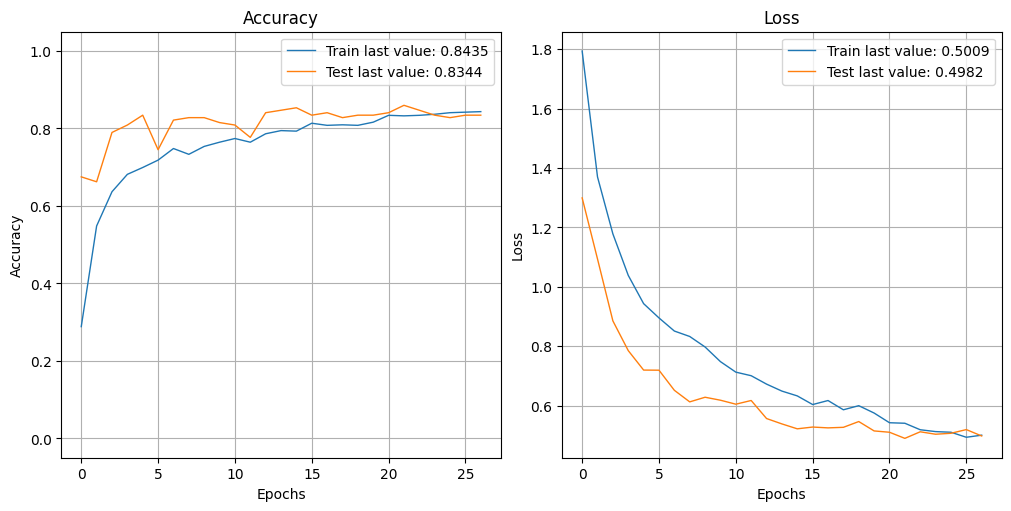

In [ ]:
show_history(history_vgg16)
plot_history(history_vgg16)
plt.close()

## 2.3 MobileNetV2 (data augmentation)

### 2.3.1 Préparation du modèle

In [ ]:
def create_mobilenetv2_model():
  data_augmentation = Sequential([
      RandomFlip("horizontal", input_shape=(224, 224, 3)),
      RandomRotation(0.1),
      RandomZoom(0.1)
  ])

  model_base = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
  for layer in model_base.layers:
      layer.trainable=False

  model = Sequential([
      data_augmentation,
      Rescaling(1./127.5, offset=-1),
      model_base,
      GlobalAveragePooling2D(),
      Dense(256, activation="relu"),
      Dropout(0.5),
      Dense(7, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  print(model.summary())
  return model

In [ ]:
with tf.device('/gpu:0'):
    model2 = create_mobilenetv2_model()

model2_save_path1 = "./model2_best.weights.h5"
checkpoint_mobilenet = ModelCheckpoint(model2_save_path1, monitor="val_loss", save_weights_only=True,
                             verbose=1, save_best_only=True, mode="min")
early_stopping_mobilenet = EarlyStopping(monitor="val_loss", mode="min",
                               verbose=1, patience=5)
callbacks_list_mobilenet = [checkpoint_mobilenet, early_stopping_mobilenet]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


### 2.3.2 Entraînement du modèle

In [ ]:
with tf.device('/gpu:0'):
    start_time_mobilenet_aug = time.time()
    history_mobilenet = model2.fit(X_train, y_train, epochs=50, batch_size=64,
                        callbacks=callbacks_list_mobilenet, validation_data=(X_val, y_val),
                        verbose=1)
    end_time_mobilenet_aug = time.time()
    time_mobilenet_aug = end_time_mobilenet_aug - start_time_mobilenet_aug
    print(f"Temps d'exécution : {time_mobilenet_aug} secondes")

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.3306 - loss: 2.2426
Epoch 1: val_loss improved from inf to 0.87110, saving model to ./model2_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 627ms/step - accuracy: 0.3406 - loss: 2.2042 - val_accuracy: 0.6943 - val_loss: 0.8711
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6918 - loss: 0.9076
Epoch 2: val_loss improved from 0.87110 to 0.58271, saving model to ./model2_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.6919 - loss: 0.9091 - val_accuracy: 0.8153 - val_loss: 0.5827
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7743 - loss: 0.7041
Epoch 3: val_loss improved from 0.58271 to 0.54099, saving model to ./model2_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.7736 - loss: 0.7059 - val_accuracy: 0.8408 - val_loss: 0.5410
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7706 - loss: 0.6865
Epoch 4: val_loss improved fr

In [ ]:
train_loss_before_mobilenet, train_accuracy_before_mobilenet = model2.evaluate(X_train, y_train, verbose=False)
val_loss_before_mobilenet, val_accuracy_before_mobilenet = model2.evaluate(X_val, y_val, verbose=False)
test_loss_before_mobilenet, test_accuracy_before_mobilenet = model2.evaluate(X_test, y_test, verbose=False)

model2.load_weights(model2_save_path1)

train_loss_after_mobilenet, train_accuracy_after_mobilenet = model2.evaluate(X_train, y_train, verbose=False)
val_loss_after_mobilenet, val_accuracy_after_mobilenet = model2.evaluate(X_val, y_val, verbose=False)
test_loss_after_mobilenet, test_accuracy_after_mobilenet = model2.evaluate(X_test, y_test, verbose=False)

### 2.3.3 Visualisation des résultats

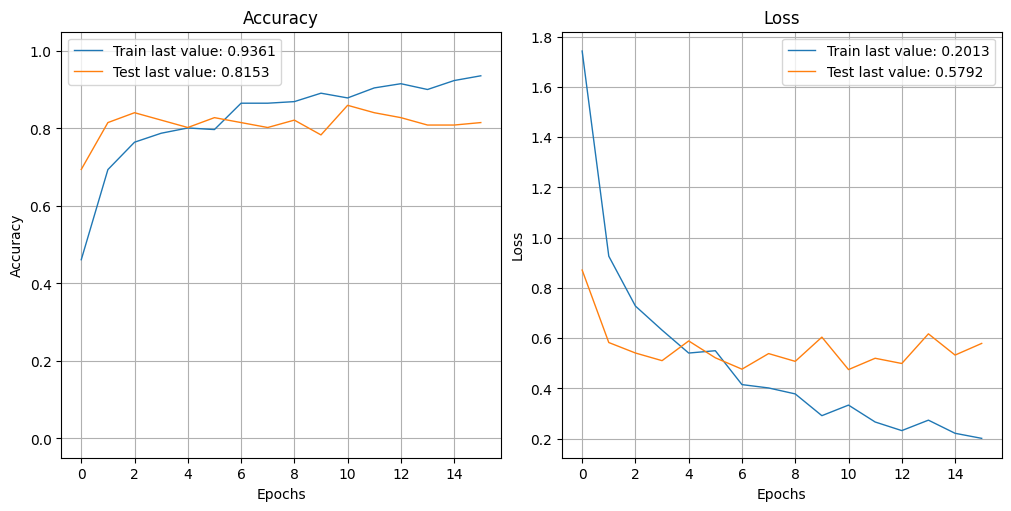

In [ ]:
show_history(history_mobilenet)
plot_history(history_mobilenet)
plt.close()

## 2.4 VGG16 (sans data augmentation)

### 2.4.1 Préparation du modèle

In [ ]:
def create_vgg16_no_augmentation():
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        # Gèle les poids du modèle pré-entrainé pour éviter des modifs durant le fit
        layer.trainable=False

    model = Sequential([
        # Normalise les valeurs des pixels entre -1 et 1
        Rescaling(1./127.5, offset=-1),
        model_base,
        # Réduit chaque carte de carac en une seule valeur moyenne
        GlobalAveragePooling2D(),
        # Ajoute une couche dense avec 256 neurones et actiation de ReLU
        Dense(256, activation="relu"),
        # Applique une régularisation pour réduire le surajustement en désactivant 50% des neurones
        Dropout(0.5),
        # Ajoute une couche de sortie avec 7 classes et une activation softmax
        Dense(7, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
with tf.device('gpu:0'):
  model_vgg16_no_aug = create_vgg16_no_augmentation()

vgg16_no_aug_path = "./model3_best.weights.h5"
checkpoint_vgg16_no_aug = ModelCheckpoint(vgg16_no_aug_path, monitor="val_loss", save_weights_only=True,
                             verbose=1, save_best_only=True, mode="min")
early_stopping_vgg16_no_aug = EarlyStopping(monitor="val_loss", mode="min",
                               verbose=1, patience=5)
callbacks_list_vgg16_no_aug = [checkpoint_vgg16_no_aug, early_stopping_vgg16_no_aug]

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

None


### 2.4.2 Entraînement du modèle

In [ ]:
with tf.device('/gpu:0'):
    start_time_vgg16_no_aug = time.time()
    history_vgg16_no_aug = model_vgg16_no_aug.fit(X_train, y_train, epochs=50, batch_size=64,
                        callbacks=callbacks_list_vgg16_no_aug, validation_data=(X_val, y_val),
                        verbose=1)
    end_time_vgg16_no_aug = time.time()
    time_vgg16_no_aug = end_time_vgg16_no_aug - start_time_vgg16_no_aug
    print(f"Temps d'exécution : {time_vgg16_no_aug} secondes")

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2846 - loss: 1.8520   
Epoch 1: val_loss improved from inf to 1.19039, saving model to ./model3_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.2928 - loss: 1.8365 - val_accuracy: 0.7389 - val_loss: 1.1904
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6279 - loss: 1.2076
Epoch 2: val_loss improved from 1.19039 to 0.98757, saving model to ./model3_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 418ms/step - accuracy: 0.6276 - loss: 1.2058 - val_accuracy: 0.7070 - val_loss: 0.9876
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7150 - loss: 1.0261
Epoch 3: val_loss improved from 0.98757 to 0.82815, saving model to ./model3_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.7153 - loss: 1.0214 - val_accuracy: 0.8025 - val_loss: 0.8282
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7263 - loss: 0.8729
Epoch 4: val_loss improved from

In [ ]:
model_vgg16_no_aug.load_weights(vgg16_no_aug_path)

train_loss_vgg16_no_aug, train_accuracy_vgg16_no_aug = model_vgg16_no_aug.evaluate(X_train, y_train, verbose=False)
val_loss_vgg16_no_aug, val_accuracy_vgg16_no_aug = model_vgg16_no_aug.evaluate(X_val, y_val, verbose=False)
test_loss_vgg16_no_aug, test_accuracy_vgg16_no_aug = model_vgg16_no_aug.evaluate(X_test, y_test, verbose=False)

## 2.5 MobileNetV2 (sans data augmentation)

### 2.5.1 Préparation du modèle

In [ ]:
def create_mobilenetv2_no_augmentation():
    model_base = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        # Gèle les poids du modèle pré-entrainé pour éviter des modifs durant le fit
        layer.trainable=False

    model = Sequential([
        # Normalise les valeurs des pixels entre -1 et 1
        Rescaling(1./127.5, offset=-1),
        model_base,
        # Réduit chaque carte de carac en une seule valeur moyenne
        GlobalAveragePooling2D(),
        # Ajoute une couche dense avec 256 neurones et actiation de ReLU
        Dense(256, activation="relu"),
        # Applique une régularisation pour réduire le surajustement en désactivant 50% des neurones
        Dropout(0.5),
        # Ajoute une couche de sortie avec 7 classes et une activation softmax
        Dense(7, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
with tf.device('gpu:0'):
  model_mobilenet_no_aug = create_mobilenetv2_no_augmentation()

mobilenet_no_aug_path = "./model4_best.weights.h5"
checkpoint_mobilenet_no_aug = ModelCheckpoint(mobilenet_no_aug_path, monitor="val_loss", save_weights_only=True,
                             verbose=1, save_best_only=True, mode="min")
early_stopping_mobilenet_no_aug = EarlyStopping(monitor="val_loss", mode="min",
                               verbose=1, patience=5)
callbacks_list_mobilenet_no_aug = [checkpoint_mobilenet_no_aug, early_stopping_mobilenet_no_aug]

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

None


### 2.5.2 Entraînement du modèle

In [ ]:
with tf.device('/gpu:0'):
    start_time_mobilenet_no_aug = time.time()
    history_mobilenet_no_aug = model_mobilenet_no_aug.fit(X_train, y_train, epochs=50, batch_size=64,
                        callbacks=callbacks_list_mobilenet_no_aug, validation_data=(X_val, y_val),
                        verbose=1)
    end_time_mobilenet_no_aug = time.time()
    time_mobilenet_no_aug = end_time_mobilenet_no_aug - start_time_mobilenet_no_aug
    print(f"Temps d'exécution : {time_mobilenet_no_aug} secondes")

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.3641 - loss: 1.9396
Epoch 1: val_loss improved from inf to 0.68651, saving model to ./model4_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3754 - loss: 1.9034 - val_accuracy: 0.7771 - val_loss: 0.6865
Epoch 2/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7912 - loss: 0.6282
Epoch 2: val_loss did not improve from 0.68651
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.7890 - loss: 0.6313 - val_accuracy: 0.7580 - val_loss: 0.7153
Epoch 3/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8474 - loss: 0.5360
Epoch 3: val_loss improved from 0.68651 to 0.62401, saving model to ./model4_best.weights.h5
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.8474 - loss: 0.5294 - val_accuracy: 0.7834 - val_loss: 0.6240
Epoch 4/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8849 - loss: 0.3563
Epoch 4: val_loss improved from 0.62401 to 0.53305, saving model to ./model4_bes

In [ ]:
model_mobilenet_no_aug.load_weights(mobilenet_no_aug_path)

train_loss_mobilenet_no_aug, train_accuracy_mobilenet_no_aug = model_mobilenet_no_aug.evaluate(X_train, y_train, verbose=False)
val_loss_mobilenet_no_aug, val_accuracy_mobilenet_no_aug = model_mobilenet_no_aug.evaluate(X_val, y_val, verbose=False)
test_loss_mobilenet_no_aug, test_accuracy_mobilenet_no_aug = model_mobilenet_no_aug.evaluate(X_test, y_test, verbose=False)

## 2.6 Résultats et conclusions

### 2.6.1 Résultats des quatres modèles

In [ ]:
results_df = pd.DataFrame({
    'Model': [
        'VGG16 (data augmentation)',
        'VGG16 (sans data augmentation)',
        'MobileNetV2 (data augmentation)',
        'MobileNetV2 (sans data augmentation)'
        ],

    'Train Accuracy': [
        train_accuracy_after_vgg16, train_accuracy_vgg16_no_aug,
        train_accuracy_after_mobilenet, train_accuracy_mobilenet_no_aug],

    'Validation Accuracy': [
        val_accuracy_after_vgg16, val_accuracy_vgg16_no_aug,
        val_accuracy_after_mobilenet, val_accuracy_mobilenet_no_aug],

    'Test Accuracy': [
        test_accuracy_after_vgg16, test_accuracy_vgg16_no_aug,
        test_accuracy_after_mobilenet, test_accuracy_mobilenet_no_aug],

    'Train Loss': [
        train_loss_after_vgg16, train_loss_vgg16_no_aug,
        train_loss_after_mobilenet, train_loss_mobilenet_no_aug],

    'Validation Loss': [
        val_loss_after_vgg16, val_loss_vgg16_no_aug,
        val_loss_after_mobilenet, val_loss_mobilenet_no_aug],

    'Test Loss' : [
        test_loss_after_vgg16, test_loss_vgg16_no_aug,
        test_loss_after_mobilenet, test_loss_mobilenet_no_aug],

    'Temps d\'exécution (s)' : [
        time_vgg16_aug, time_vgg16_no_aug,
        time_mobilenet_aug, time_mobilenet_no_aug],

    'Epochs utilisées' : [
        len(history_vgg16.epoch), len(history_vgg16_no_aug.epoch),
        len(history_mobilenet.epoch), len(history_mobilenet_no_aug.epoch)
    ]
})

results_df.style.format({
    'Train Accuracy': '{:.2%}',
    'Validation Accuracy': '{:.2%}',
    'Test Accuracy': '{:.2%}',
    'Train Loss': '{:.4f}',
    'Validation Loss': '{:.4f}',
    'Test Loss': '{:.4f}',
    'Temps d\'exécution (s)' : '{:.2f}'
}).set_caption('Résultats des modèles avec et sans data augmentation')

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train Loss,Validation Loss,Test Loss,Temps d'exécution (s),Epochs utilisées
0,VGG16 (data augmentation),89.25%,85.99%,81.01%,0.3766,0.4902,0.7194,197.55,27
1,VGG16 (sans data augmentation),95.65%,82.80%,79.75%,0.2162,0.4953,0.6929,222.54,30
2,MobileNetV2 (data augmentation),93.61%,85.99%,79.11%,0.1881,0.4751,0.7264,50.18,16
3,MobileNetV2 (sans data augmentation),97.96%,81.53%,79.75%,0.1100,0.5132,0.6740,61.80,10


Voici la conclusion de ces différents modèles avec et sans data augmentation.

Concernant les loss, on a une meilleure perte avec la data augmentation.

Dans la globalité, le modèle MobileNetV2 gère mieux la data augmentation car cela apporte de meilleurs résultats, contrairement à VGG16, en tout cas avec nos paramètres actuels.

On remarque également un meilleur temps d'exécution pour les modèles MobileNetV2 avec un nombre d'epochs moins grand.

### 2.6.2 Visualisation des erreurs

In [ ]:
y_pred_prob = model_mobilenet_no_aug.predict(X_test)

y_pred_classes = np.argmax(y_pred_prob, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 849ms/step


In [ ]:
error_indices = np.where(y_pred_classes != y_true_classes)[0]
print(f"Nombre d'erreurs : {len(error_indices)}")

Nombre d'erreurs : 32


In [ ]:
category_names = label_encoder.classes_

errors_df = pd.DataFrame({
    'Index' : error_indices,
    'Vraie catégorie' : [category_names[x] for x in y_true_classes[error_indices]],
    'Prédiction' : [category_names[x] for x in y_pred_classes[error_indices]]
})

errors_df.head()

,Index,Vraie catégorie,Prédiction
0,4,Computers,Kitchen & Dining
1,7,Computers,Kitchen & Dining
2,8,Baby Care,Home Furnishing
3,15,Computers,Baby Care
4,21,Baby Care,Home Furnishing


In [ ]:
sampled_errors_df = errors_df.sample(5)

In [ ]:
def denormalize_image(image):
  image = (image - image.min()) / (image.max() - image.min())
  return image

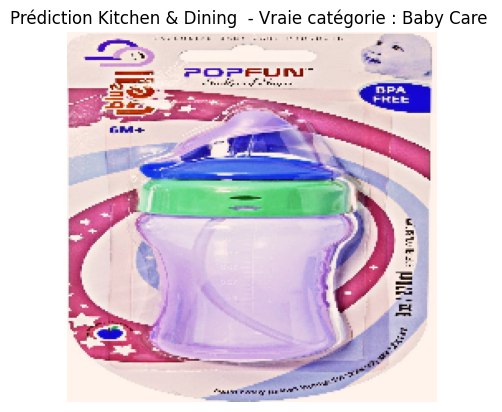

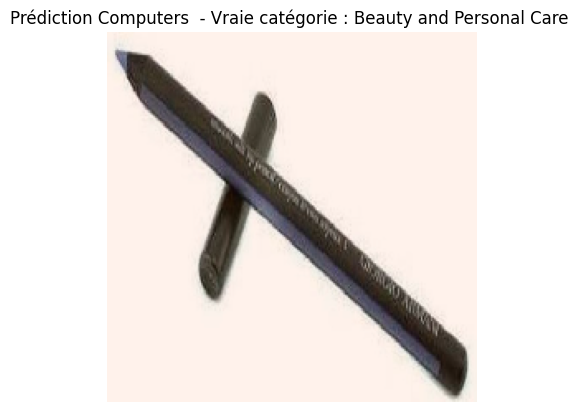

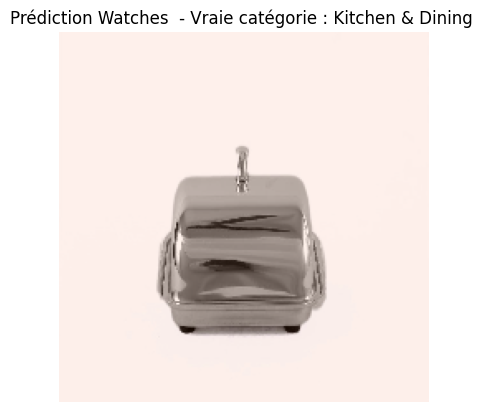

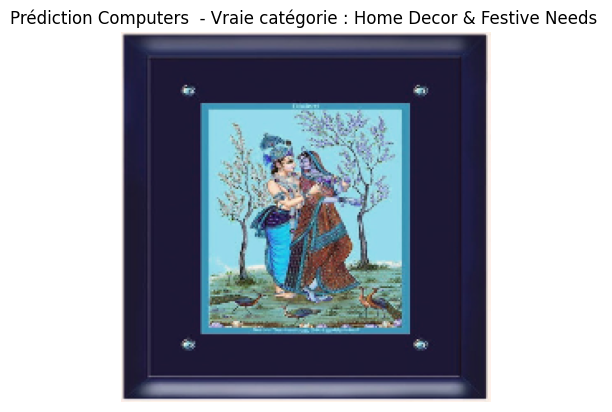

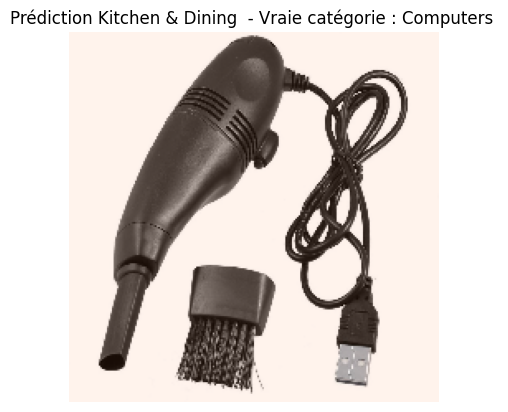

In [ ]:
for _, row in sampled_errors_df.iterrows():
  image = X_test[row['Index']]
  image = denormalize_image(image)
  plt.imshow(image)
  plt.title(f"Prédiction {row['Prédiction']} - Vraie catégorie : {row['Vraie catégorie']}")
  plt.axis('off')
  plt.show()